In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-individual-electricity-shortfall-challenge/sample_submission_load_shortfall (1).csv
/kaggle/input/edsa-individual-electricity-shortfall-challenge/df_train.csv
/kaggle/input/edsa-individual-electricity-shortfall-challenge/df_test.csv
/kaggle/input/ea-predict-dataset/sample_submission.csv
/kaggle/input/ea-predict-dataset/movies.csv
/kaggle/input/ea-predict-dataset/imdb_data.csv
/kaggle/input/ea-predict-dataset/genome_tags.csv
/kaggle/input/ea-predict-dataset/genome_scores.csv
/kaggle/input/ea-predict-dataset/train.csv
/kaggle/input/ea-predict-dataset/test.csv
/kaggle/input/ea-predict-dataset/tags.csv
/kaggle/input/ea-predict-dataset/links.csv


In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import accuracy

In [6]:
train = pd.read_csv('/kaggle/input/ea-predict-dataset/train.csv')
movies = pd.read_csv('/kaggle/input/ea-predict-dataset/movies.csv')
test = pd.read_csv('/kaggle/input/ea-predict-dataset/test.csv')

In [7]:
#viewing training data
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
#viewing Movie data
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
#viewing test data
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [10]:
train_combined = pd.merge(train, movies, on='movieId')

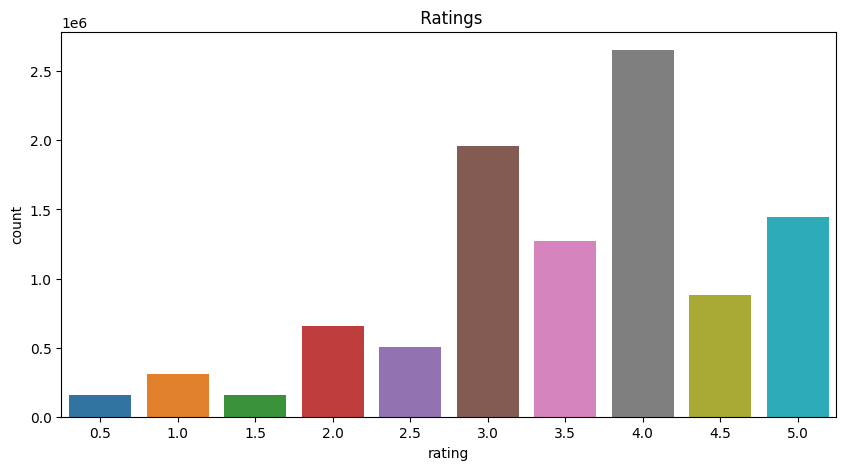

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data= train_combined )
plt.title(' Ratings')
plt.show()

In [14]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train_combined[['userId', 'movieId', 'rating']], reader)

In [15]:
trainset, testset = train_test_split(data, test_size=0.2)

In [20]:

from surprise import SVD
#  model
algo = SVD()
algo.fit(trainset)

In [23]:
rating_predict = algo.test(testset)
 
# model Evaluation
accuracy.rmse(rating_predict)
 
# Print RMSE
print("rsme: ", accuracy.rmse(rating_predict, verbose=False))

RMSE: 0.8341
rsme:  0.834075886636753


In [26]:
# merging data
test_combined = pd.merge(test, movies, on='movieId')

In [27]:
rate_predict = [algo.predict(uid, iid) for uid, iid in test_combined[['userId', 'movieId']].values]

In [30]:
submission = pd.DataFrame(rate_predict, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
submission['Id'] = submission[['uid', 'iid']].apply(lambda x: f'{x[0]}_{x[1]}', axis=1)
submission['rating'] = submission['est']
submission[['Id', 'rating']].to_csv('Results.csv', index=False)

/tmp/ipykernel_33/4227337334.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  submission['Id'] = submission[['uid', 'iid']].apply(lambda x: f'{x[0]}_{x[1]}', axis=1)
